In [15]:
!ls -l /data/speech/digital_human/preprocessed/

total 28
drwxrwxr-x 2 scpark scpark 4096  8월  7 21:41 jeewonPark
drwxrwxr-x 2 scpark scpark 4096  8월  7 21:23 jinwooOh
drwxrwxr-x 2 scpark scpark 4096  8월  7 21:32 kyuchulLee
drwxrwxr-x 2 scpark scpark 4096  8월  7 21:23 kyuseokKim
drwxrwxr-x 2 scpark scpark 4096  8월  7 21:41 nohsikPark
drwxrwxr-x 2 scpark scpark 4096  8월  7 21:37 soochulPark
drwxrwxr-x 2 scpark scpark 4096  8월  7 21:23 yehunHwang


In [16]:
import os

root_dir = '/data/speech/digital_human/preprocessed/jeewonPark'
files = sorted([os.path.join(root_dir, file) for file in os.listdir(root_dir)])
print(len(files))

files

10


['/data/speech/digital_human/preprocessed/jeewonPark/MH_ARKit_003_10_iPhone_raw.npy',
 '/data/speech/digital_human/preprocessed/jeewonPark/MH_ARKit_003_11_iPhone_raw.npy',
 '/data/speech/digital_human/preprocessed/jeewonPark/MH_ARKit_003_12_iPhone_raw.npy',
 '/data/speech/digital_human/preprocessed/jeewonPark/MH_ARKit_003_1_iPhone_raw.npy',
 '/data/speech/digital_human/preprocessed/jeewonPark/MH_ARKit_003_2_iPhone_raw.npy',
 '/data/speech/digital_human/preprocessed/jeewonPark/MH_ARKit_003_3_iPhone_raw.npy',
 '/data/speech/digital_human/preprocessed/jeewonPark/MH_ARKit_003_4_iPhone_raw.npy',
 '/data/speech/digital_human/preprocessed/jeewonPark/MH_ARKit_003_5_iPhone_raw.npy',
 '/data/speech/digital_human/preprocessed/jeewonPark/MH_ARKit_003_8_iPhone_raw.npy',
 '/data/speech/digital_human/preprocessed/jeewonPark/MH_ARKit_003_9_iPhone_raw.npy']

In [17]:
import numpy as np
import librosa
import matplotlib.pyplot as plt

blends = []
for file in files[::5]:
    data = np.load(file, allow_pickle=True).item()
    wav = data['wav']
    wav = librosa.resample(wav, orig_sr=44100, target_sr=24000, res_type='polyphase')
    blend = data['blendshapes']    
    blends.append(blend)
    mel = librosa.feature.melspectrogram(y=wav, sr=24000, n_fft=2048, hop_length=800, win_length=2048)
    mel = np.log10(mel + 1e-5)
    print(mel.shape, blend.shape)
    
blend = np.concatenate(blends, axis=0)
print(blend.shape)

(128, 8997) (8996, 61)
(128, 9932) (9932, 61)
(18928, 61)


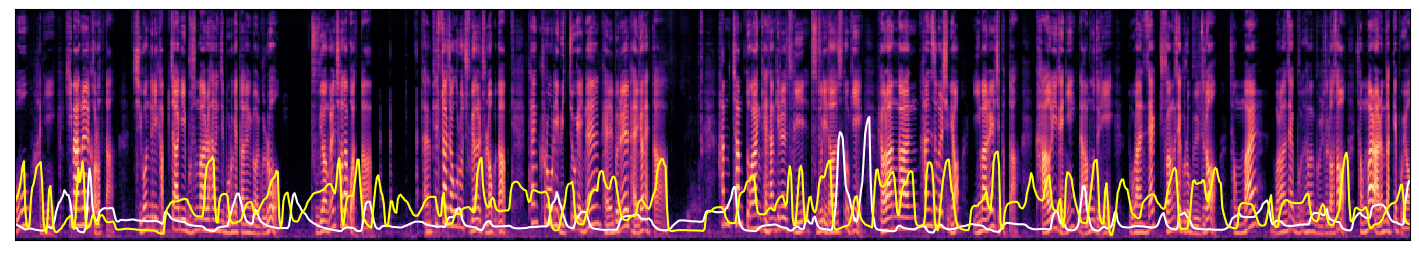

In [11]:
import librosa.display

plt.figure(figsize=[18, 3])
librosa.display.specshow(mel[:, 3000:4000], cmap='magma')
plt.plot(blend[3000:4000, 20]*100, color='white')
plt.plot(blend[3000:4000, 37]*100, color='yellow')
plt.show()


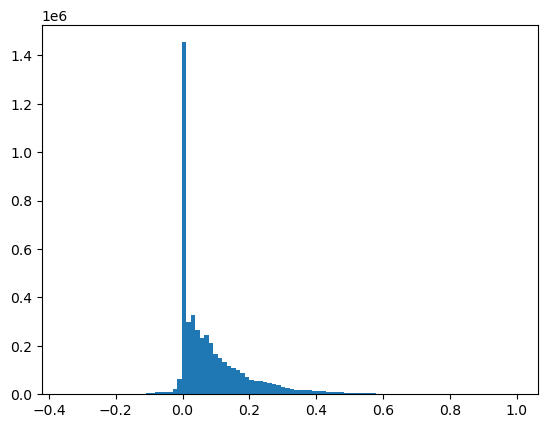

In [12]:
plt.hist(blend.reshape(-1), bins=100)
plt.show()

-2.4232043674866746 1.2468325311149726


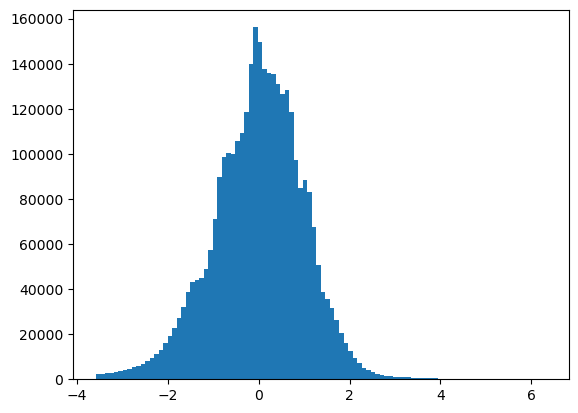

In [79]:
from scipy.special import logit
eps = 1e-3

b = np.clip(blend, eps, 1 - eps)
b = b[b!=eps]
b = logit(b).reshape(-1)
print(np.mean(b), np.std(b))
b = (b - np.mean(b)) / np.std(b)
plt.hist(b, bins=100)
plt.show()


In [43]:
from scipy.special import logit

b = np.clip(blend, 0, 1)
np.min(b[b != 0])

1e-10

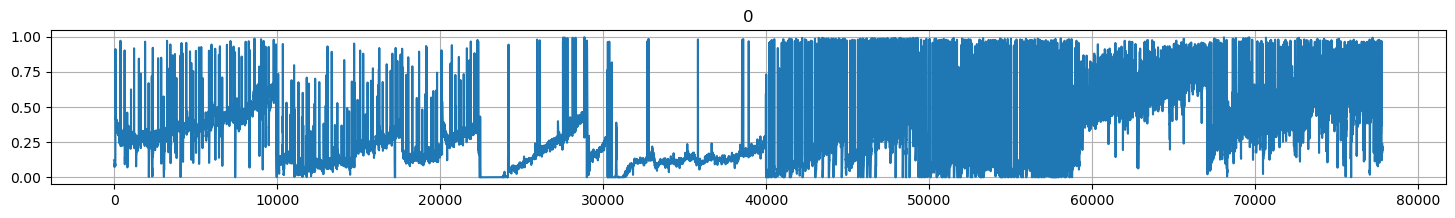

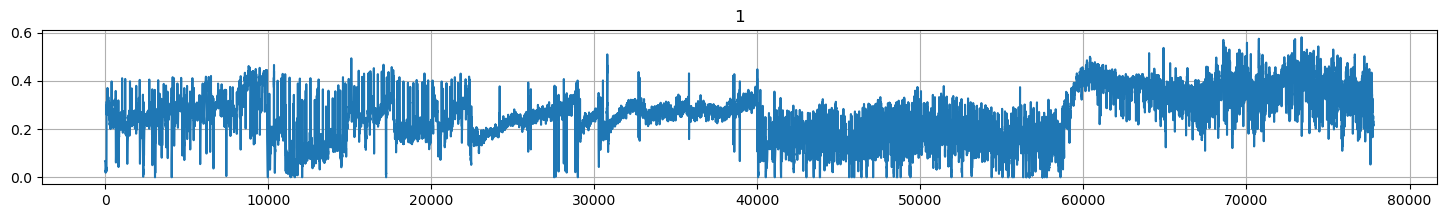

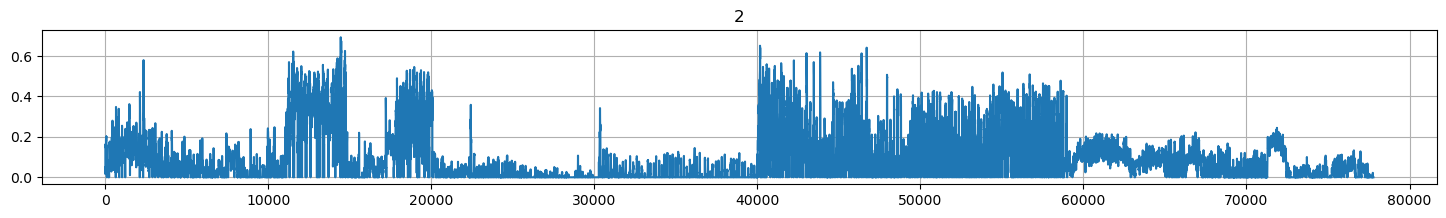

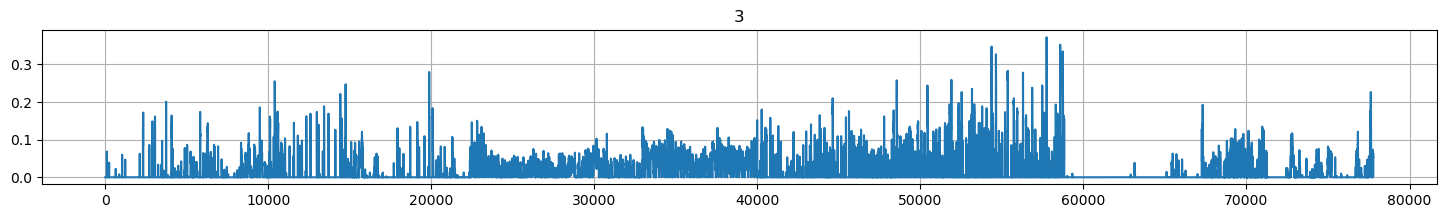

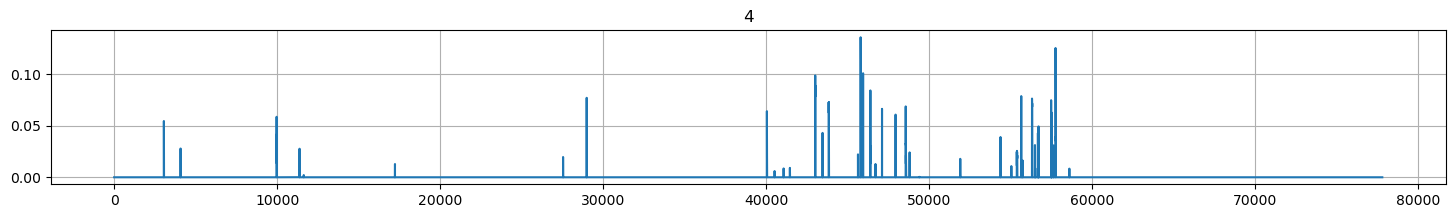

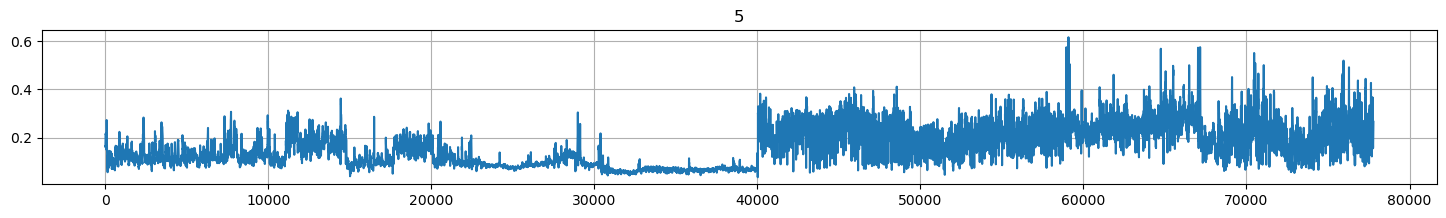

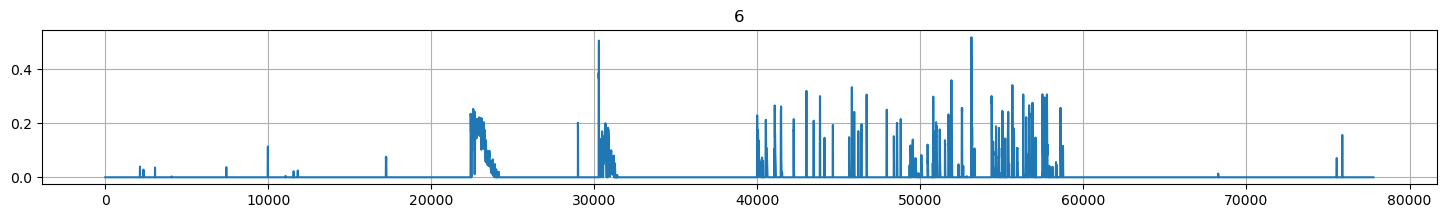

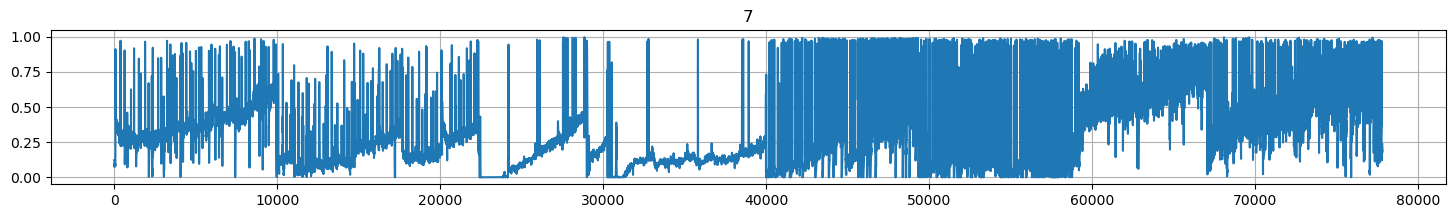

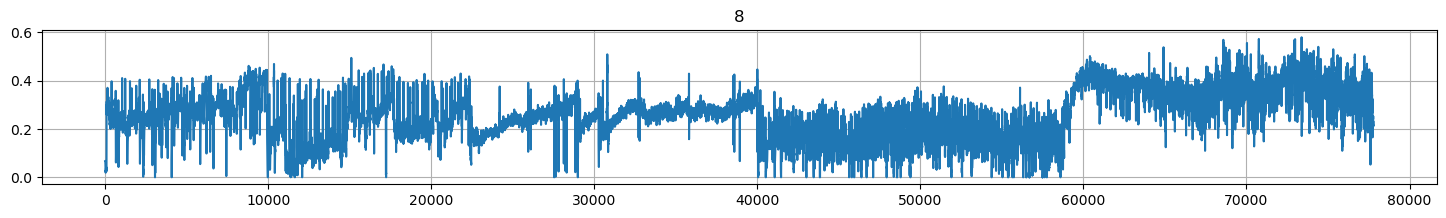

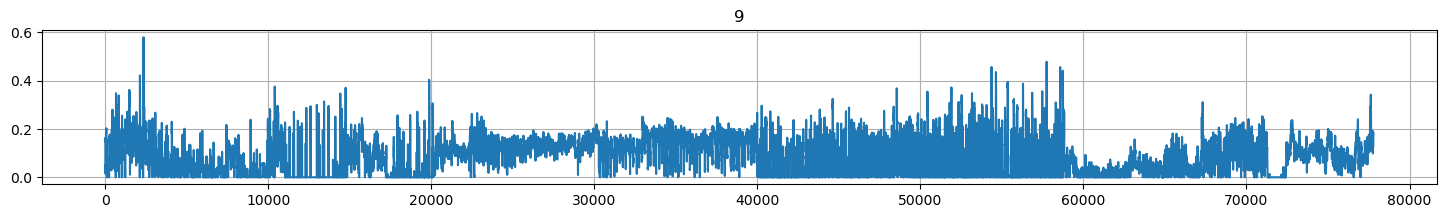

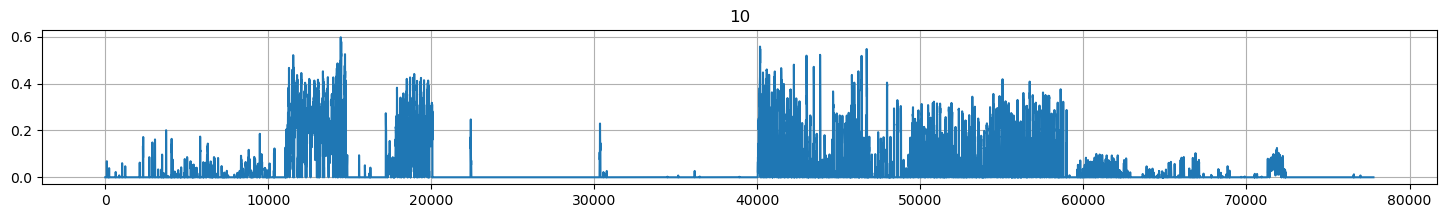

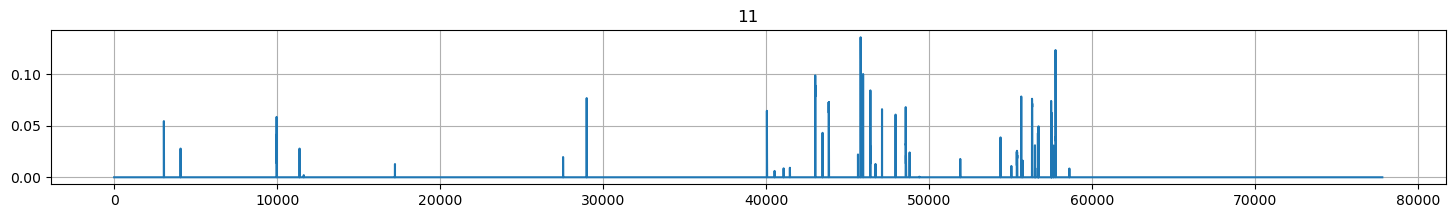

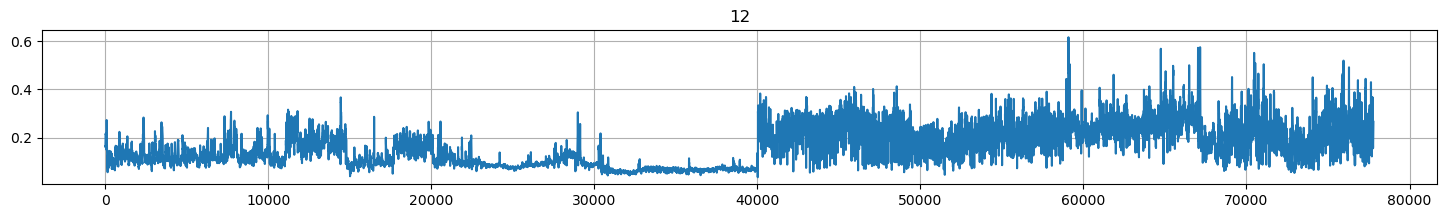

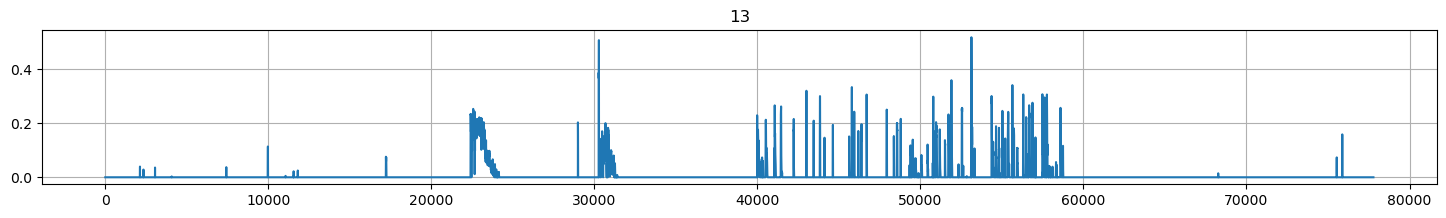

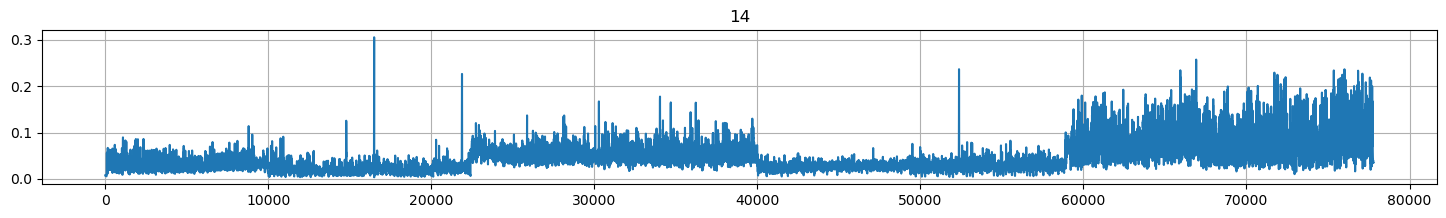

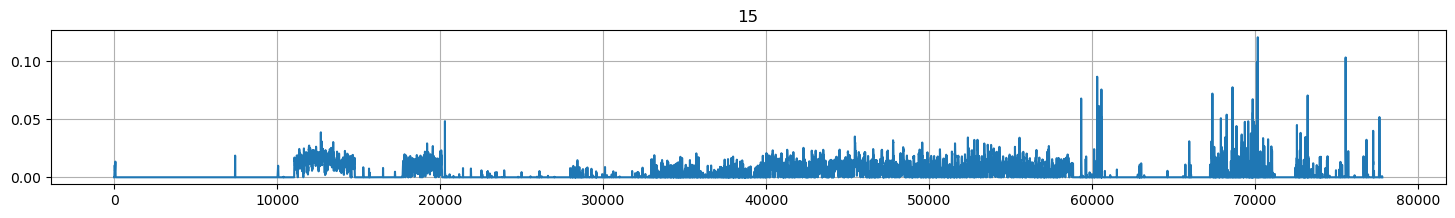

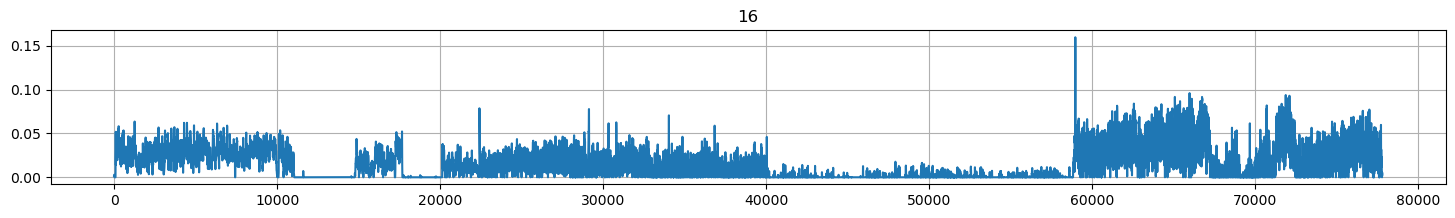

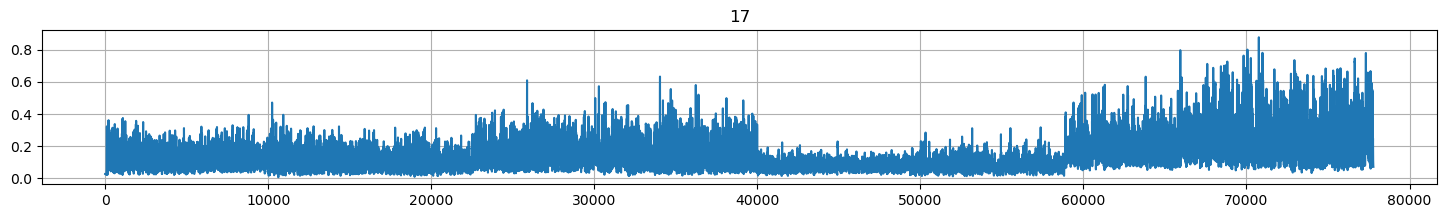

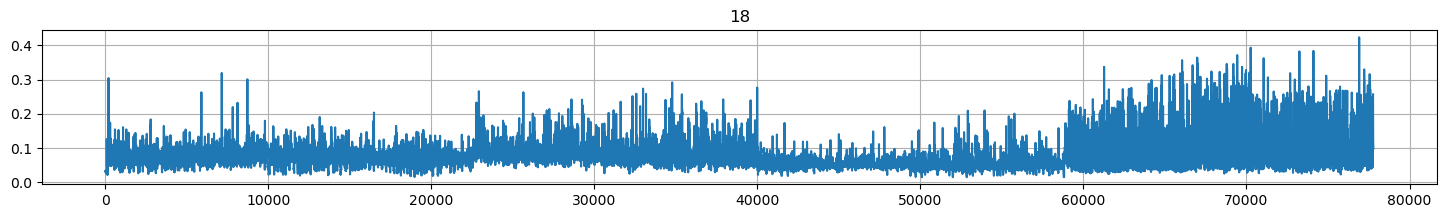

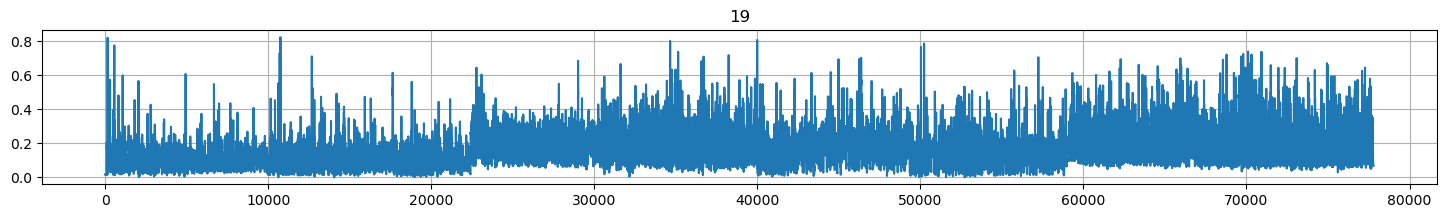

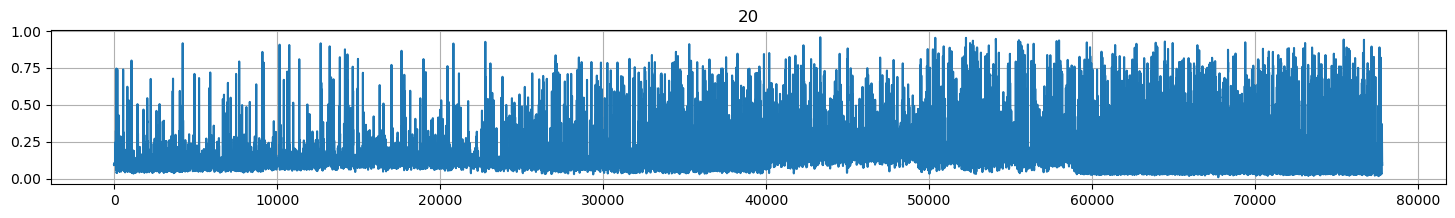

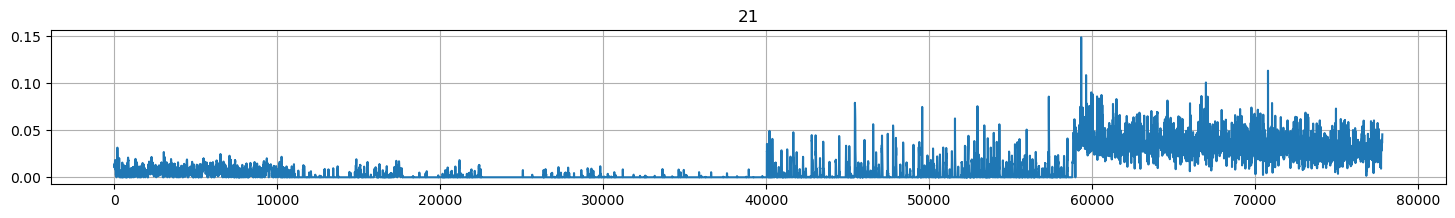

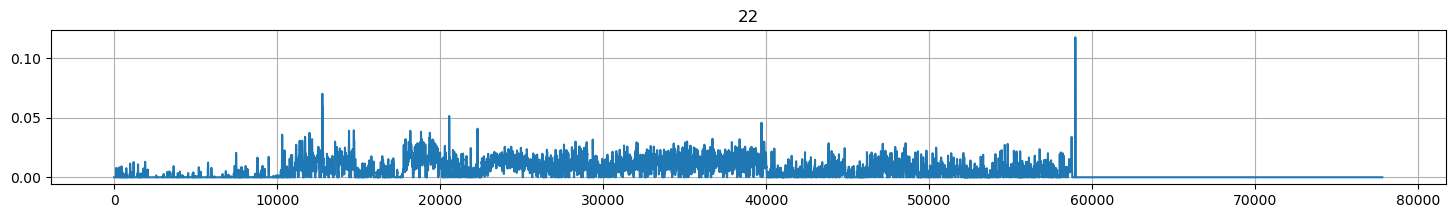

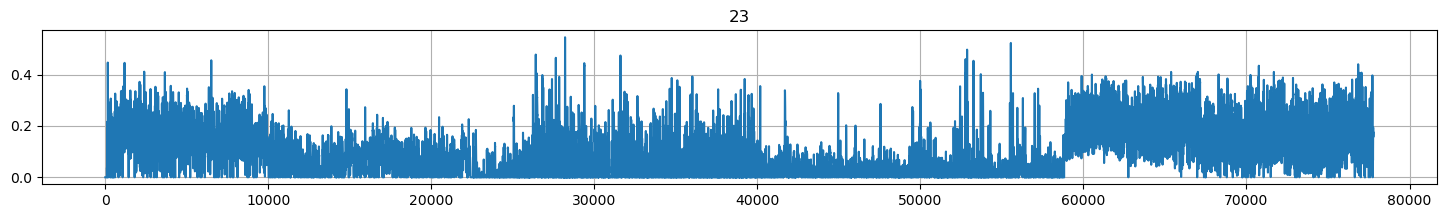

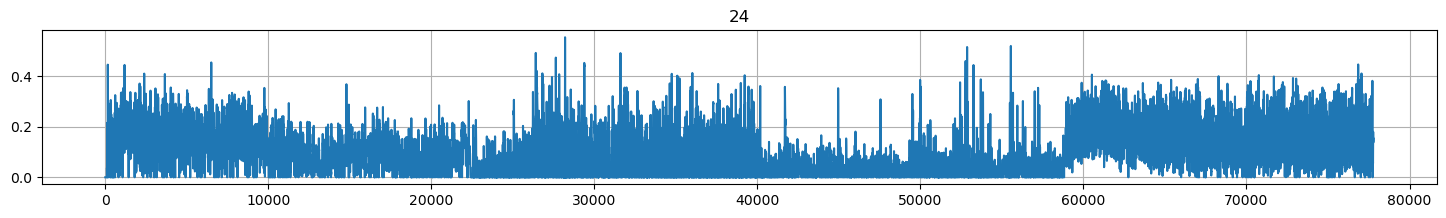

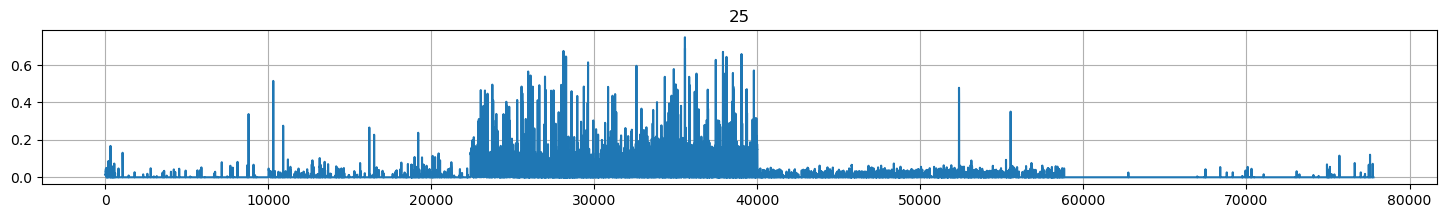

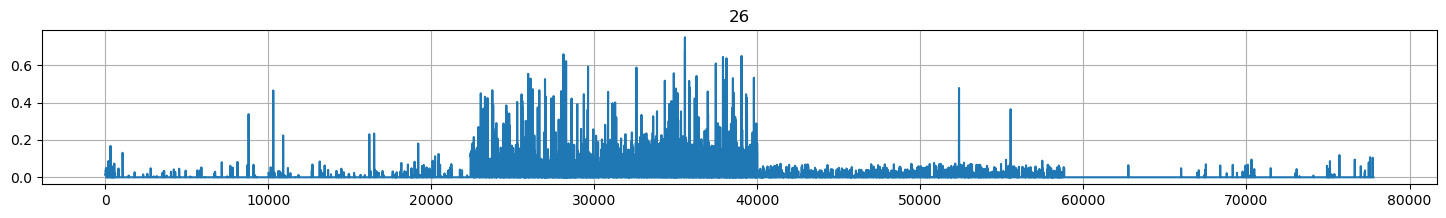

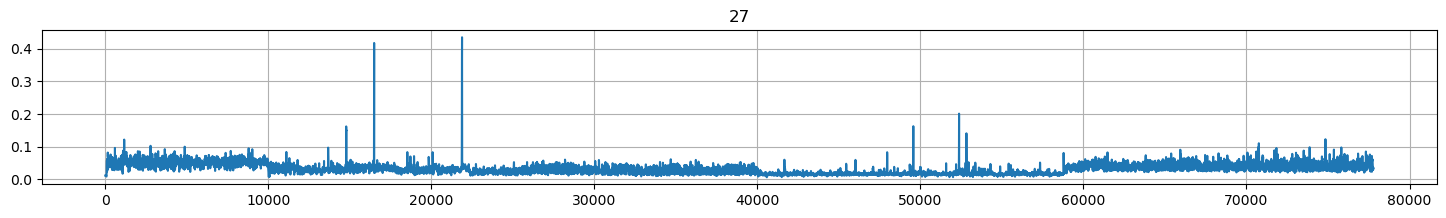

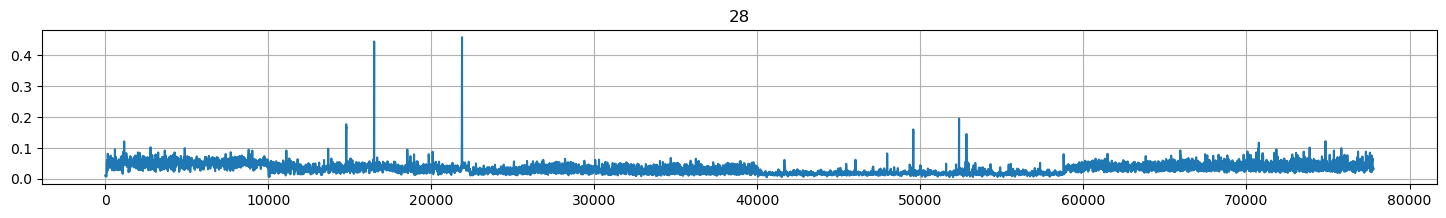

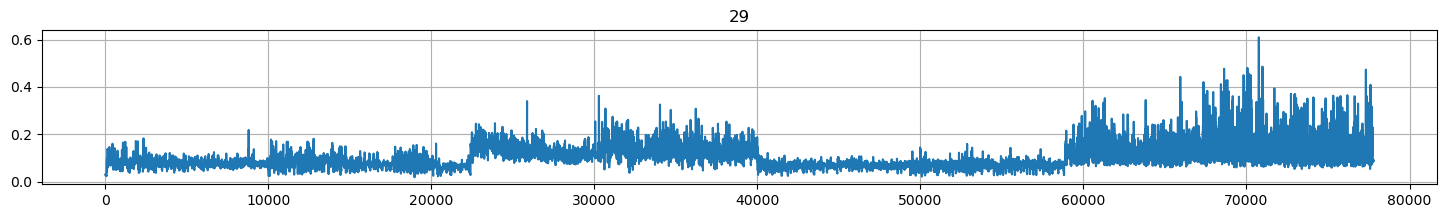

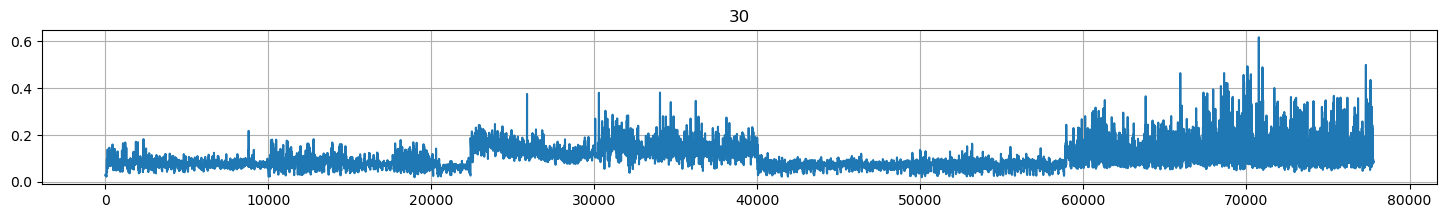

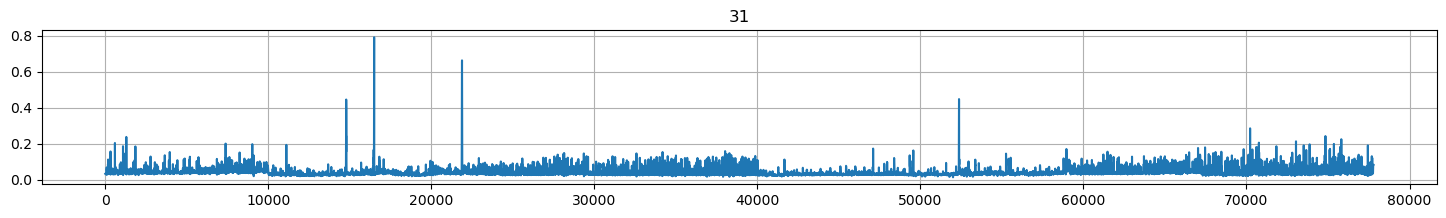

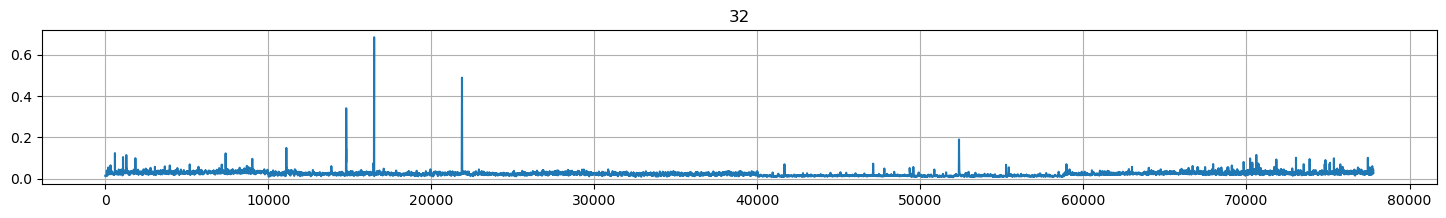

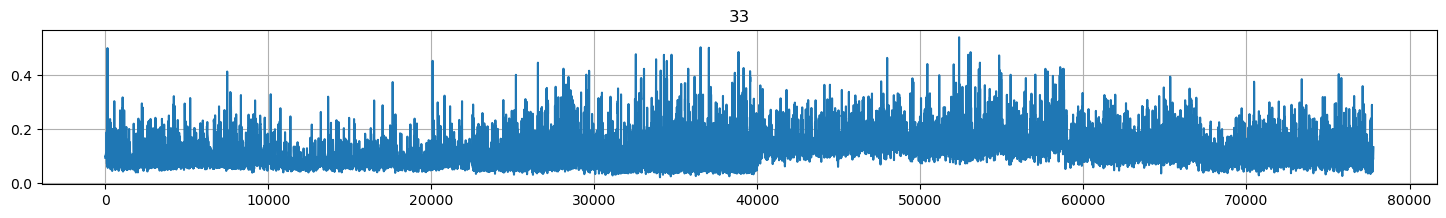

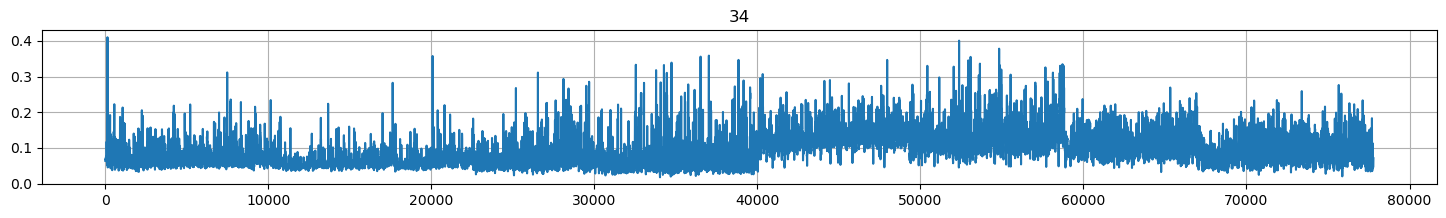

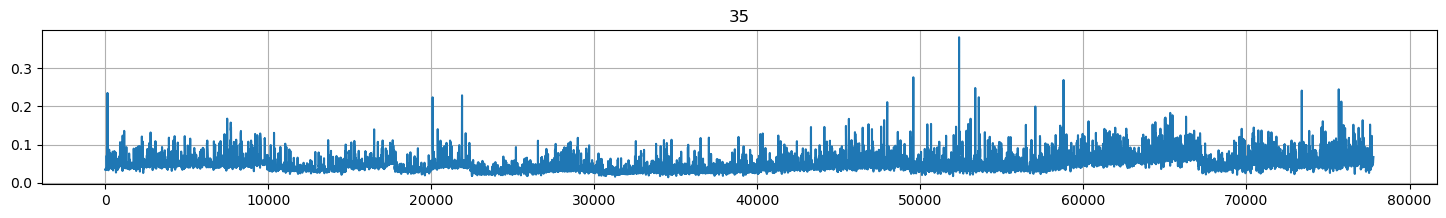

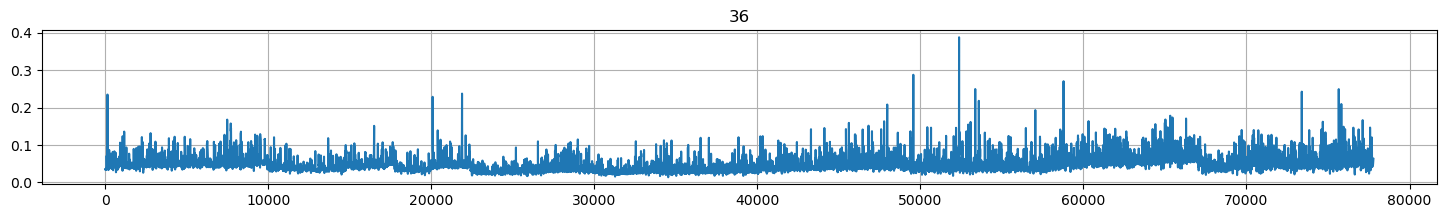

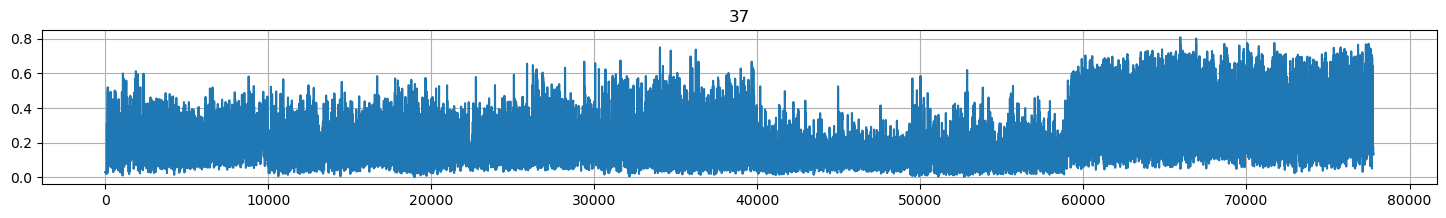

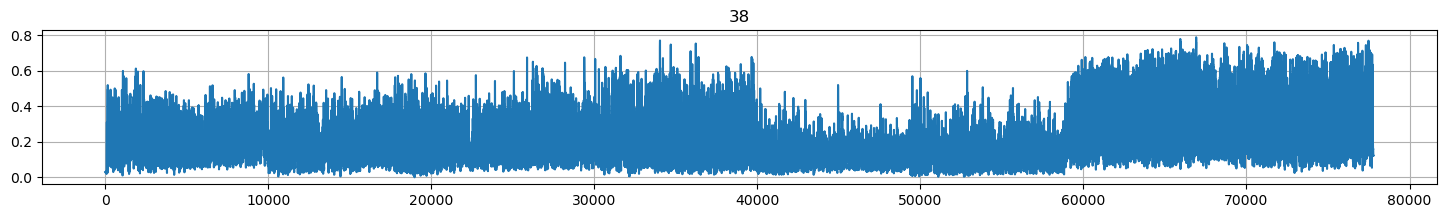

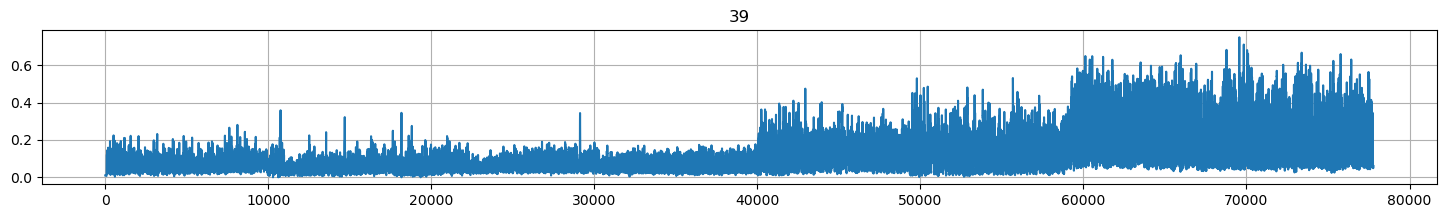

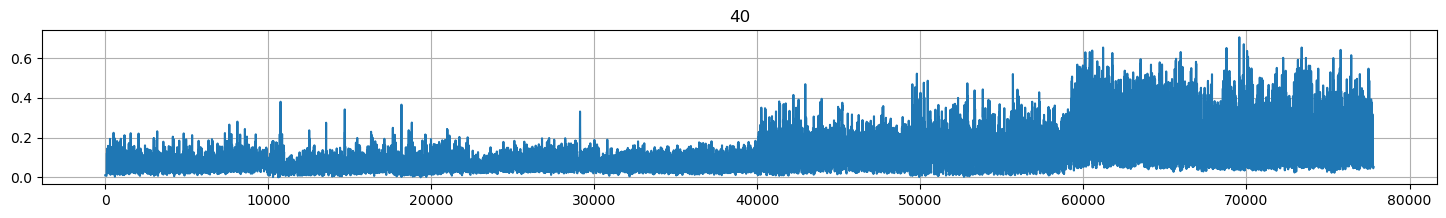

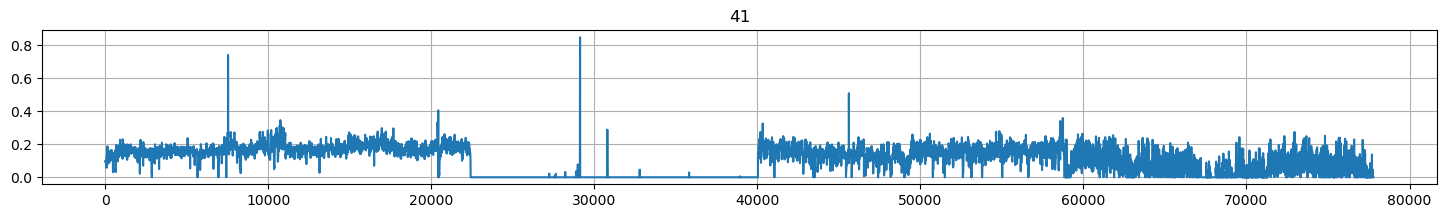

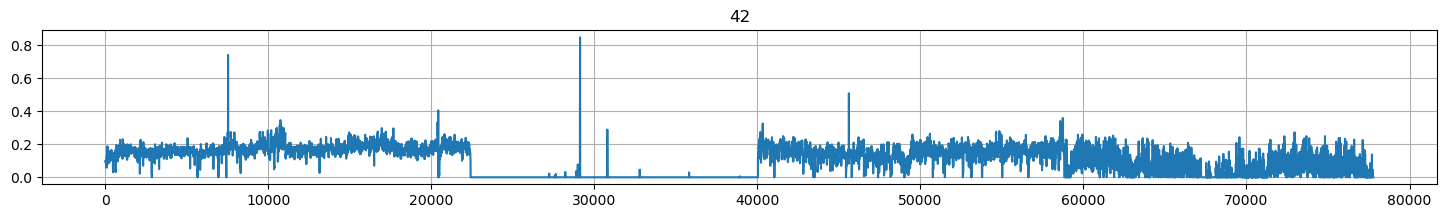

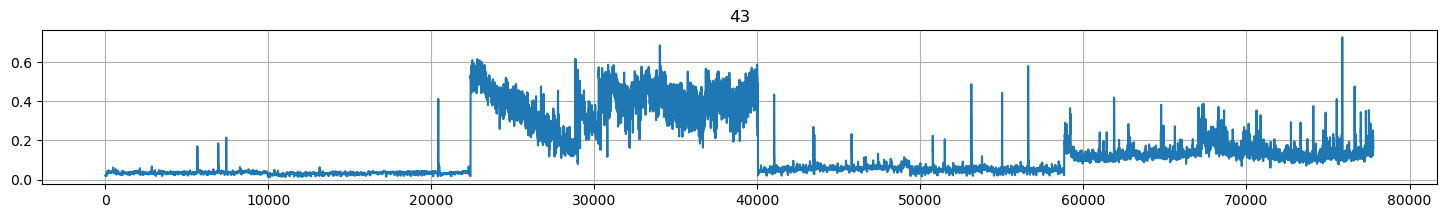

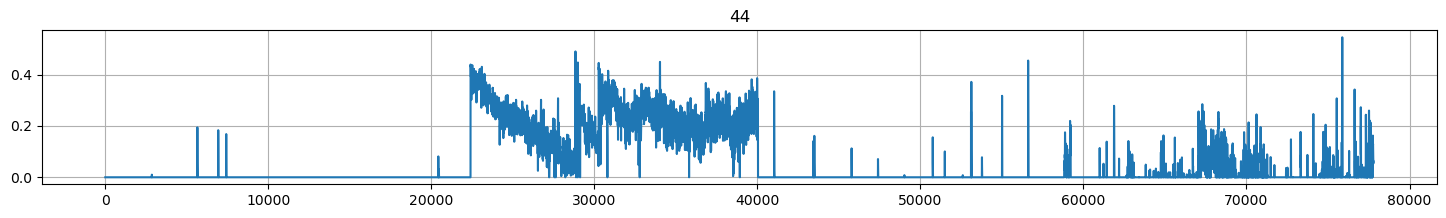

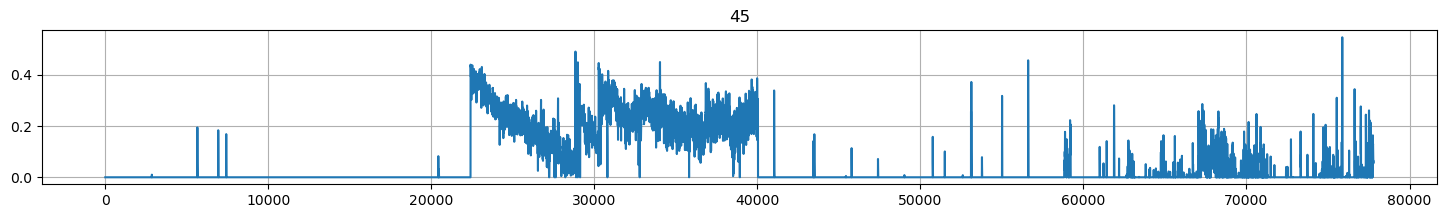

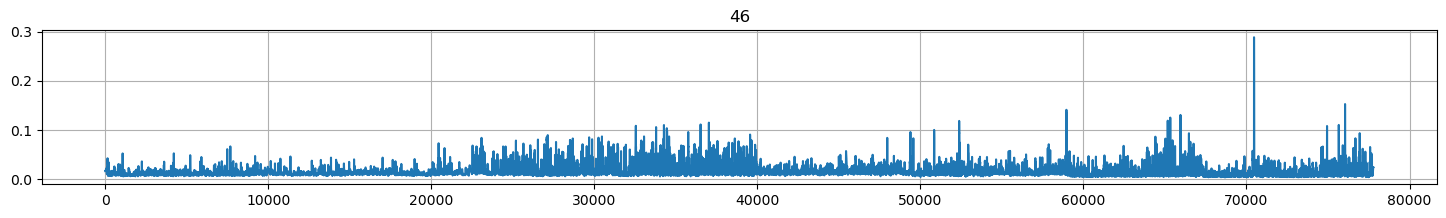

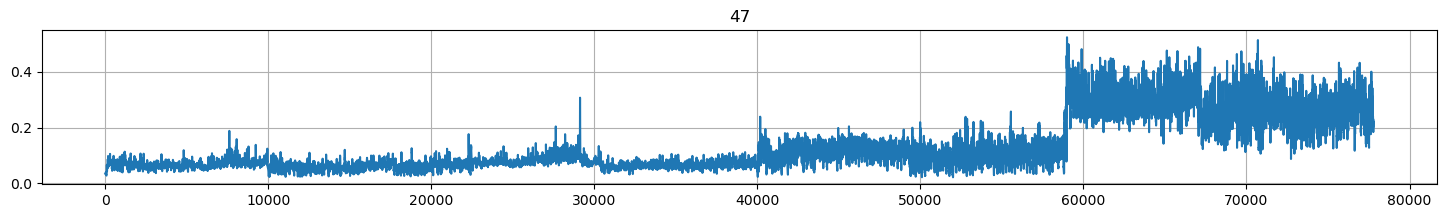

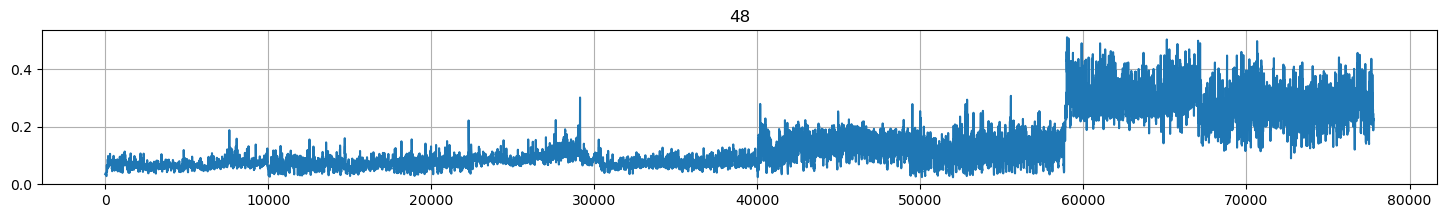

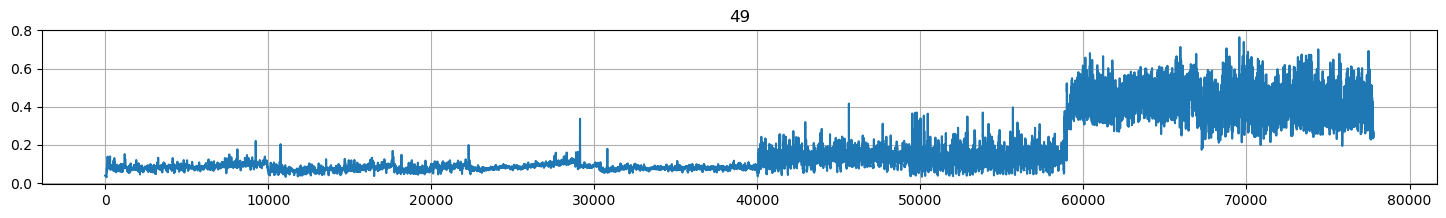

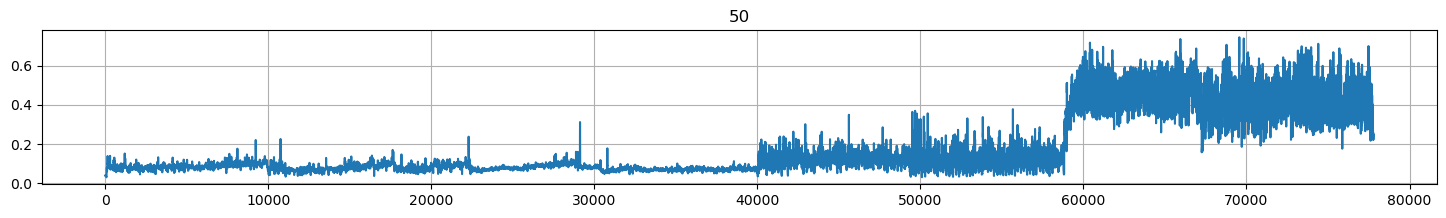

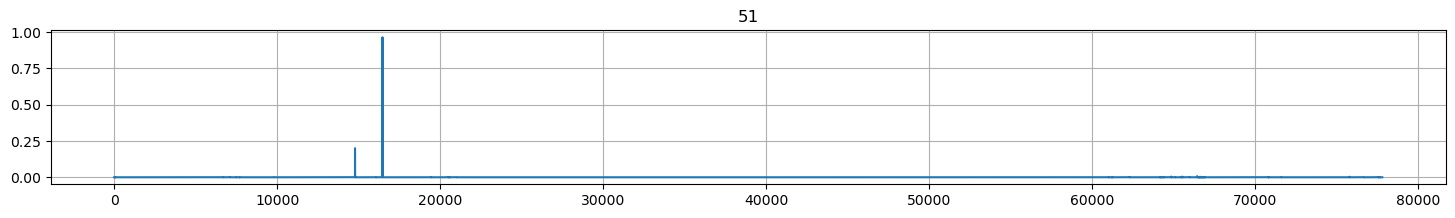

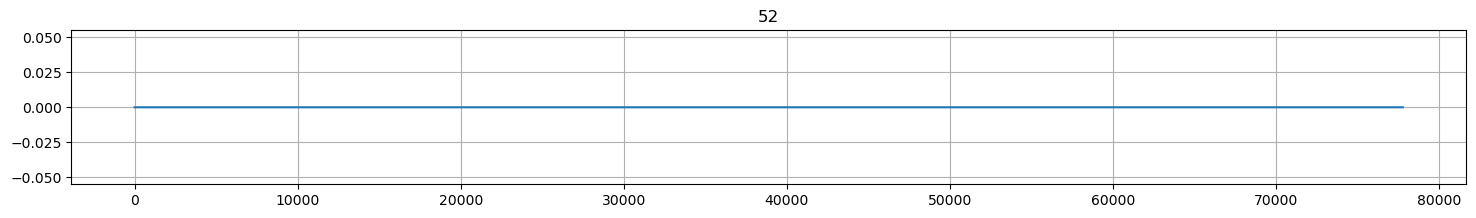

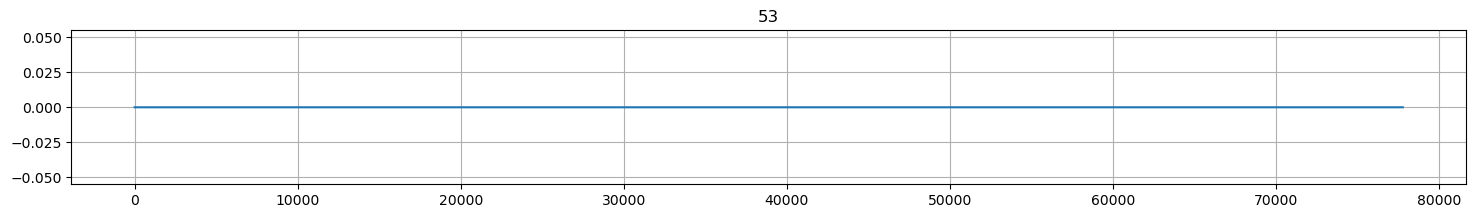

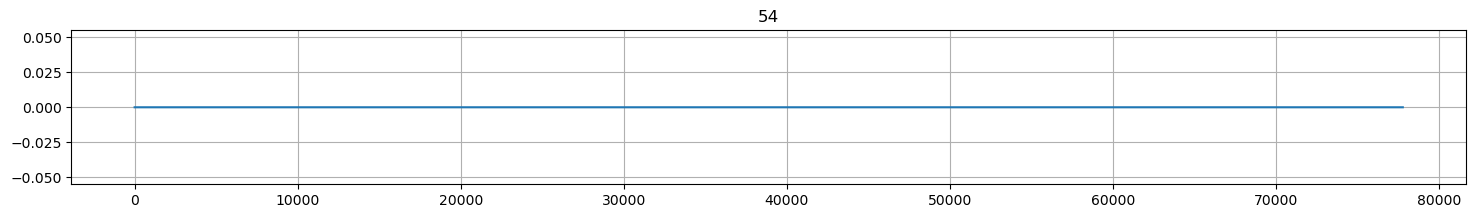

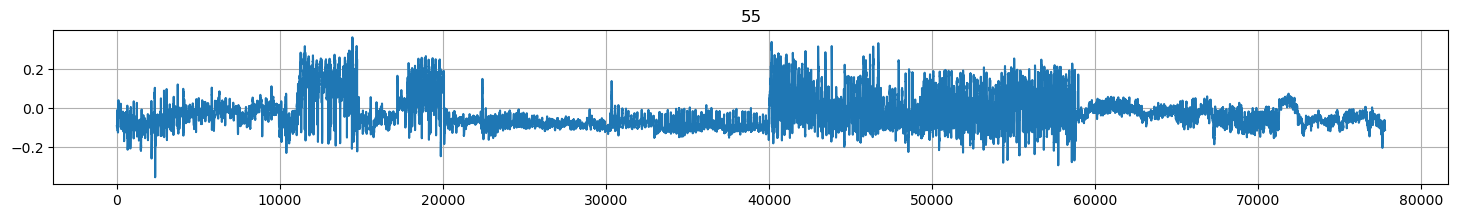

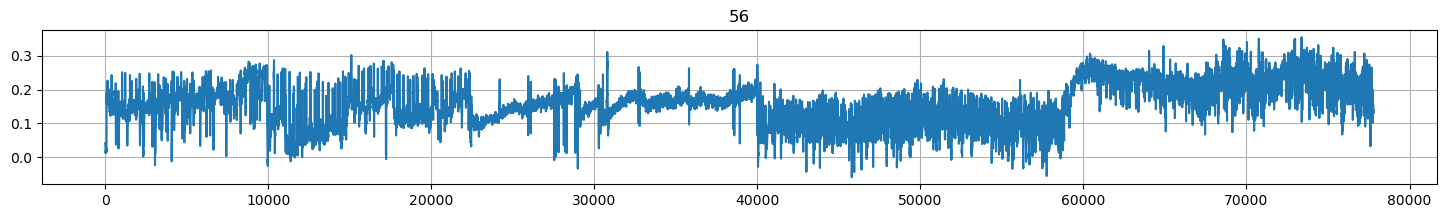

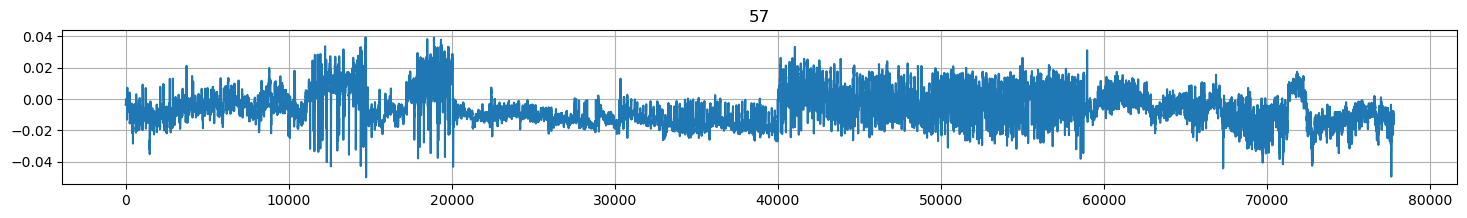

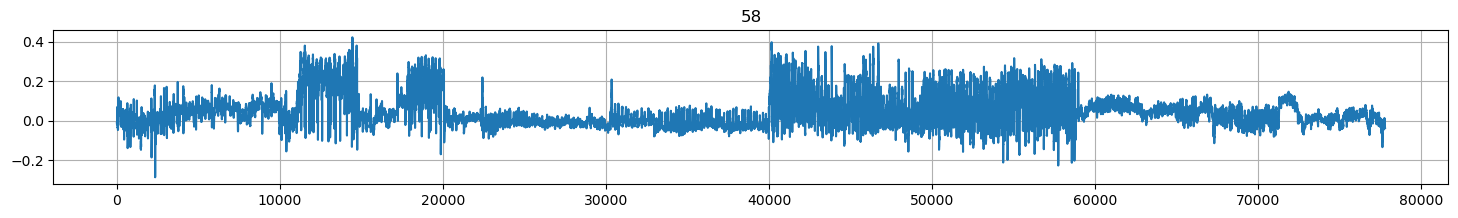

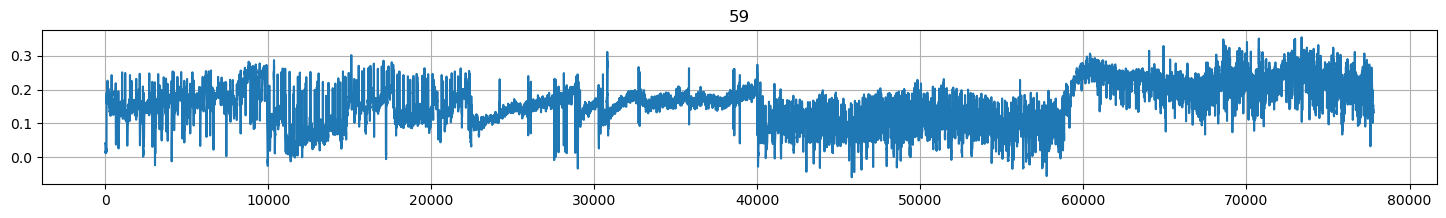

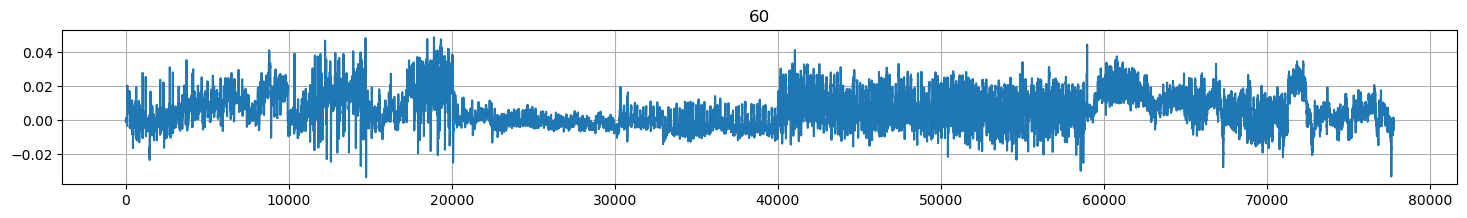

In [14]:
for i in range(61):
    plt.figure(figsize=[18, 2])
    plt.title(str(i))
    plt.plot(blend[:, i])
    plt.grid()
    plt.show()